Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [49]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Create a dataframe named "data" from the given datafile and print it's head

In [50]:
# read data into a DataFrame
data = pd.read_csv(r'C:\Users\Nikita Tandel\Downloads\datasets_insurance.csv', header=0)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [51]:
print(data.dtypes)
print(data.shape)
print(data.describe())

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
(1338, 7)
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Check if there are missing values. If yes, handle them.

In [52]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

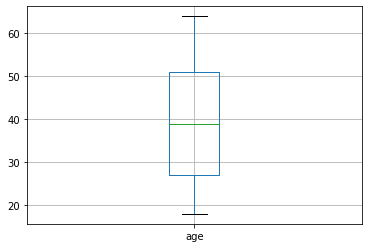

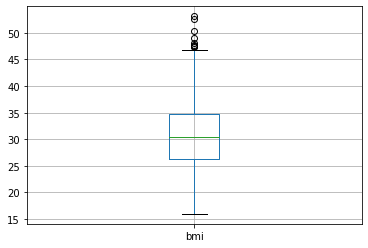

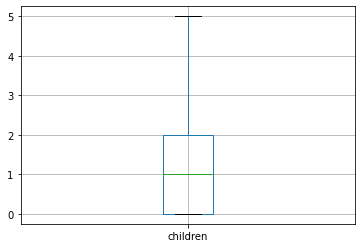

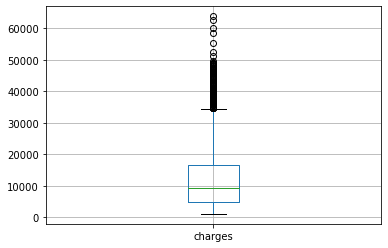

In [53]:
import matplotlib.pyplot as plt
colname=[]
for x in data.columns:
    if data[x].dtype=="int64" or data[x].dtype=="float64":
        colname.append(x)

for x in colname:
    data.boxplot(column=x)
    plt.show()

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

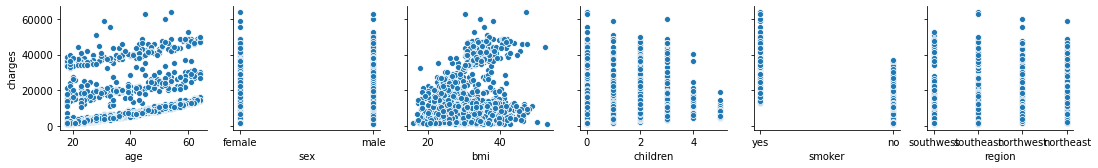

In [54]:
#Assumption of Linearity:Every ind var should have a linear relationship with the dep var.
sns.pairplot(data,x_vars=data.columns[:-1],y_vars="charges",
             kind='scatter')

Create X and Y

In [55]:
# create X and Y
X = data.iloc[:,:-1]
Y = data["charges"]


Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

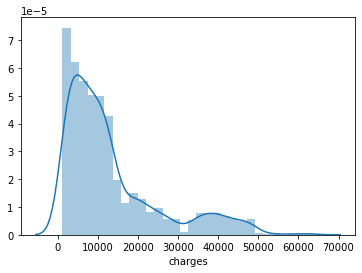

In [56]:
sns.distplot(Y,hist=True)

In [57]:
# Log transformation
import numpy as np
Y_log  = np.log(Y)

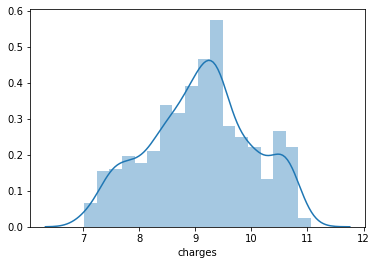

In [58]:
sns.distplot(Y_log,hist=True)

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of map function. Refer to clustering code file.<br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3

In [59]:
X["sex"]=X.sex.map({"male":1,"female":0})

In [60]:
X["smoker"]=X.smoker.map({"no":0,"yes":1})

In [61]:
X["region"]=X.region.map({"northeast":0,"northwest":1,"southeast":2,"southwest":3})

Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000136F0F8DAC8>,
      dtype=object)

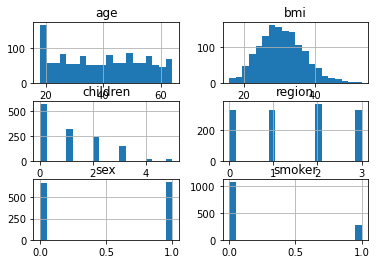

In [62]:
X.hist(bins=20)

Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


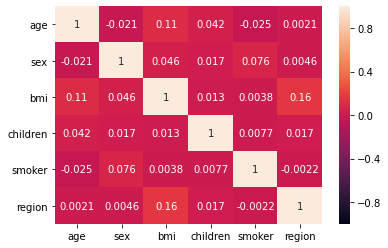

In [63]:

corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.37
3,children,1.80
4,smoker,1.26
5,region,2.92


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [65]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2,
                                                    random_state=10)  


Build a base Linear Regression model using sklearn.

In [66]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)



6.998797622591984
[ 0.03498834 -0.0711322   0.01259126  0.09962977  1.5693443  -0.03889152]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [24]:
# pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('age', 0.03498834149076492), ('sex', -0.0711322000534307), ('bmi', 0.012591262605123998), ('children', 0.09962976583044039), ('smoker', 1.5693443019666669), ('region', -0.03889151819958849)]


Predict using the model.

In [25]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 8.90264566  8.55800249  9.44206862  9.37109228  8.30231857  8.93127398
  9.22860018  9.62770497  8.96169962 10.524292    8.12183109  8.270934
  8.75991467  9.14967223  9.23002002  9.36183759  8.32332991  9.81527793
  9.18395253 10.20908992 10.5308626   8.06726747  7.95992684  8.77128514
  8.43374205  9.41895434  9.01687327  9.41850025  8.42170066 10.20084299
  7.72507636 10.38861159  8.89576619  8.94511958  8.45447782  8.89057139
  9.43604078  9.09248396  9.09271164  8.89473802  9.58926813  9.15682789
  8.54484462  8.99761391  7.99767708  8.81979395  8.91337357 10.61798009
  9.30298176  9.24221911 10.01078002  8.31758485  8.90942155  9.62809789
  9.09900057  9.38167738  9.30538021  8.63050675  8.707771   10.70371838
  7.87802912 10.61635976 11.07322819  7.95757539  9.99650111  8.87336923
  8.47709653  8.90772216  8.86749958  8.92965431  8.81908517  7.95741791
  8.85051652  8.89426488  8.97913786  9.33234154  8.55732546  8.82884226
  7.81072893  9.33028012  9.26333526  9.18682528  9.7

Evaluate the model.

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7049534517624696
0.4882327185684707
0.703623414730595


Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [27]:

from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


7.000415207061314
[ 0.03498462 -0.07025584  0.01259184  0.09952118  1.5602262  -0.03886915]


In [28]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


"""
Previous values:
0.7049534517624696
0.48823271856847067
0.703623414730595
"""

0.7052731948166417
0.48796809703937566
0.7039445991509017


'\nPrevious values:\n0.7049534517624696\n0.48823271856847067\n0.703623414730595\n'

In [29]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


7.895875452206856
[ 0.03043079  0.          0.          0.          0.         -0.        ]


In [31]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.21387850856962498
0.7969415049819166
0.21033476029871412


Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [32]:
new_df=pd.DataFrame()
new_df=X_train

new_df["charges"]=Y_train
new_df.shape

C:\Users\Nikita Tandel\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(1070, 7)

Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>
Check for the Assumption 5- No autocorrelation 

In [33]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='charges ~ age+sex+bmi+children+smoker+region', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    6.998798
age          0.034988
sex         -0.071132
bmi          0.012591
children     0.099630
smoker       1.569344
region      -0.038892
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     632.4
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        02:27:17   Log-Likelihood:                -620.60
No. Observations:                1070   AIC:                             1255.
Df Residuals:                    1063   BIC:                             1290.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

Predict using the model. Evaluate the model.

In [34]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7049534517624702
0.4882327185684703
0.7036234147305955


Check for Assumption 6-Errors should be random.<br>
Hint: Diagnostic plot

Text(0, 0.5, 'Residuals')

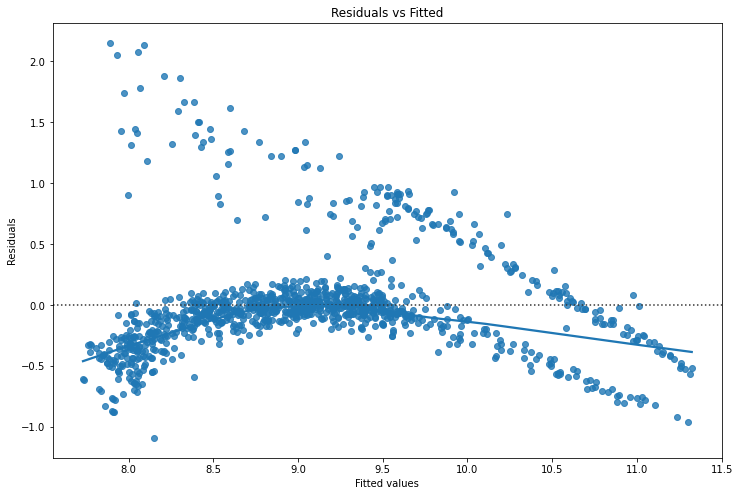

In [35]:
import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'charges', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

Check for Assumption 7-Errors should follow normal distribution.<br>
Hint: Diagnostic plot

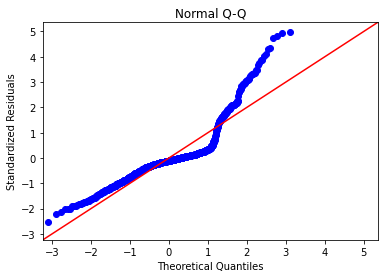

In [36]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 

Check for Assumption 8-Errors should folllow constant variance.<br>
Hint: Diagnostic plot

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

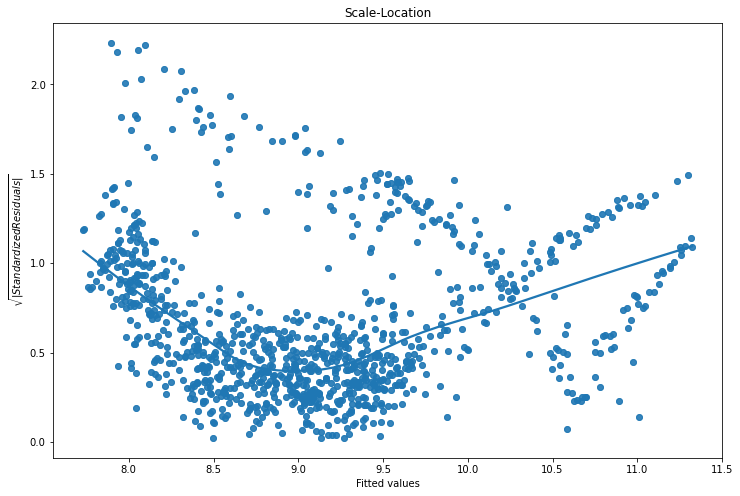

In [37]:
# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

Scale the data using Standard Scaler to prepare it for SGD.

In [38]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)
#scaler.fit(X)
#X=scaler.transform(X)
#print(X)

Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [39]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2,
                                                    random_state=10)  


Build the SGDRegressor.

In [42]:

from sklearn.linear_model import SGDRegressor
lm = SGDRegressor(learning_rate="constant",eta0=0.001,random_state=10,max_iter=2000)
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


[9.09312151]
[ 0.49410378 -0.03725578  0.08002416  0.12030414  0.63259363 -0.04300626]


Predict using the model. Evaluate the model. Perform trial and error to reach the optimum model.

In [43]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.7048236861972573
0.48834007252736417
0.7034930641966439


Write down your conclusion as to which is the final model that you would go with along with the reasons.

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [67]:
sample_data={"age":[56,51,31,64,44,43,56], "sex":[1,0,1,1,0,1,1], "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725], "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}

X_test_sample=pd.DataFrame(sample_data)

In [68]:
Y_pred_sample=lm.predict(X_test_sample)
Y_pred_sample

array([10.70755254,  8.97158381, 10.27465961,  9.57184058,  8.96169962,
        8.92522424,  9.27276136])

Save the predicted values along with the observations into an excel file.

In [69]:
pred_Y=np.exp(Y_pred_sample)
pred_Y

array([44692.12260342,  7876.06592779, 28988.64878107, 14354.81317298,
        7798.60086822,  7519.26929971, 10644.10353556])

In [ ]:
"""
Actual values:
22412.6485
9644.2525
38746.3551
14988.432
8211.1002
7441.501
10976.24575

"""
